In [ ]:
!pip install tweet-preprocessor
!pip install STOPWORDS

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from preprocessor.api import clean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sotu_retweets = pd.read_csv("/content/drive/MyDrive/Text, Web and Social Media Analytics/sotu2018-rt.csv")
sotu_retweets.head()

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status-extended_tweet-full_text,quoted_status-text,quoted_status-user-screen_name,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries
0,NaN,NaN,Wed Jan 31 03:51:59 +0000 2018,NaN,0,False,low,NaN,958548390052179968,958548390052179968,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,A PERFECT ANALOGY:\n\nSeveral democrats are br...,A PERFECT ANALOGY:\n\nSeveral democrats are br...,ScottPresler,"<a href=""http://twitter.com/download/iphone"" r...",RT @ScottPresler: A PERFECT ANALOGY:\n\nSevera...,1517370719813,False,MatthewJAld,NaN
1,NaN,NaN,Wed Jan 31 03:55:33 +0000 2018,NaN,0,False,low,NaN,958549287285215232,958549287285215232,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,NaN,President Trump invited families of Americans ...,RealJack,"<a href=""http://twitter.com/download/android"" ...",RT @RealJack: President Trump invited families...,1517370933730,False,broussard_sr,NaN
2,NaN,NaN,Wed Jan 31 03:09:22 +0000 2018,NaN,0,False,low,NaN,958537665334296577,958537665334296577,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,NaN,Don't you be fooled by any of his White Suprem...,UNITEDWEDREAM,"<a href=""http://twitter.com/download/iphone"" r...",RT @UNITEDWEDREAM: Don't you be fooled by any ...,1517368162841,False,CLSTEPHANY,NaN
3,NaN,NaN,Wed Jan 31 02:36:19 +0000 2018,NaN,0,False,low,NaN,958529347828305921,958529347828305921,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,NaN,Uh-oh. Our president mentioned the FIRST and S...,TomiLahren,"<a href=""http://twitter.com/download/iphone"" r...",RT @TomiLahren: Uh-oh. Our president mentioned...,1517366179793,False,DAWNSTUTESMAN,NaN
4,NaN,NaN,Wed Jan 31 02:46:24 +0000 2018,NaN,0,False,low,NaN,958531885424173057,958531885424173057,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,"Tonight isn't about memos, fake news, free thi...","Tonight isn't about memos, fake news, free thi...",TomiLahren,"<a href=""http://twitter.com/download/android"" ...","RT @TomiLahren: Tonight isn't about memos, fak...",1517366784803,False,SCischk,NaN


In [ ]:
sotu_retweets_Fox = sotu_retweets.loc[(sotu_retweets['user-screen_name'] == "FoxNews") | (sotu_retweets['retweeted_status-user-screen_name']  == "FoxNews")]
sotu_retweets_Fox.head(5)

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status-extended_tweet-full_text,quoted_status-text,quoted_status-user-screen_name,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries
52,NaN,NaN,Wed Jan 31 03:14:11 +0000 2018,NaN,0,False,low,NaN,958538876695523328,958538876695523328,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""Terrorists who do things like place ...",".@POTUS: ""Terrorists who do things like place ...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""Terrorists who do thing...",1517368451652,False,coachfoster15,NaN
55,NaN,NaN,Wed Jan 31 02:52:54 +0000 2018,NaN,0,False,low,NaN,958533520988753923,958533520988753923,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""For decades, open borders have allow...",".@POTUS: ""For decades, open borders have allow...",FoxNews,"<a href=""http://twitter.com/#!/download/ipad"" ...","RT @FoxNews: .@POTUS: ""For decades, open borde...",1517367174752,False,VoseJim,NaN
58,NaN,NaN,Wed Jan 31 03:06:20 +0000 2018,NaN,0,False,low,NaN,958536901211967489,958536901211967489,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""We celebrate our police, our militar...",".@POTUS: ""We celebrate our police, our militar...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""We celebrate our police...",1517367980660,False,slewis8353,NaN
73,NaN,NaN,Wed Jan 31 03:16:53 +0000 2018,NaN,0,False,low,NaN,958539556155994112,958539556155994112,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,.@POTUS: â€œLetâ€™s begin tonight by recognizi...,.@POTUS: â€œLetâ€™s begin tonight by recognizi...,FoxNews,"<a href=""http://twitter.com/download/android"" ...",RT @FoxNews: .@POTUS: â€œLetâ€™s begin tonight...,1517368613648,False,TravarL,NaN
84,NaN,NaN,Wed Jan 31 03:36:51 +0000 2018,NaN,0,False,low,NaN,958544581058064384,958544581058064384,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""We repealed the core of disastrous #...",".@POTUS: ""We repealed the core of disastrous #...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""We repealed the core of...",1517369811678,False,kujayhawksone66,NaN


User-screen_name: The person who is retweeting

retweeted_status-user-screen_name: The person who has been retweeted

In [ ]:
#Frequency of how often FoxNews was retweeted
len(sotu_retweets_Fox[sotu_retweets_Fox["retweeted_status-user-screen_name"] == "FoxNews"])

128

In [ ]:
#Frequency of how often FoxNews retweeted something
len(sotu_retweets_Fox[sotu_retweets_Fox["user-screen_name"] == "FoxNews"])

1

# Part A

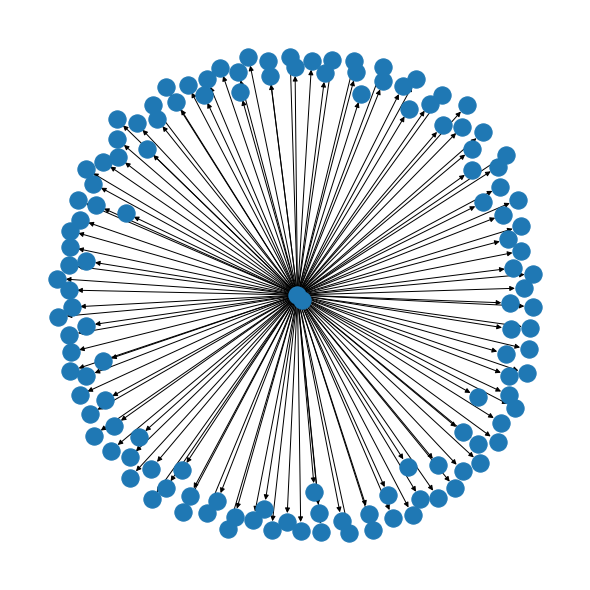

In [ ]:
G_rt = nx.from_pandas_edgelist( sotu_retweets_Fox, source ='retweeted_status-user-screen_name', target = 'user-screen_name', create_using = nx.DiGraph())
plt.figure(3,figsize=(8,8))
nx.draw(G_rt)
plt.show()

The one in the middle is FoxNews while the other ones are the users who have retweeted FoxNews.

In [ ]:
print(G_rt.number_of_nodes())
print(G_rt.number_of_edges())

130
129


The nodes are all users who are listed in the dataset and the number of edges refers to reference betweem a retweet and the user, who has retweeted.

In [ ]:
#the degree are the number of edges adjacent to a node
G_rt.degree("FoxNews")

129

# Part B

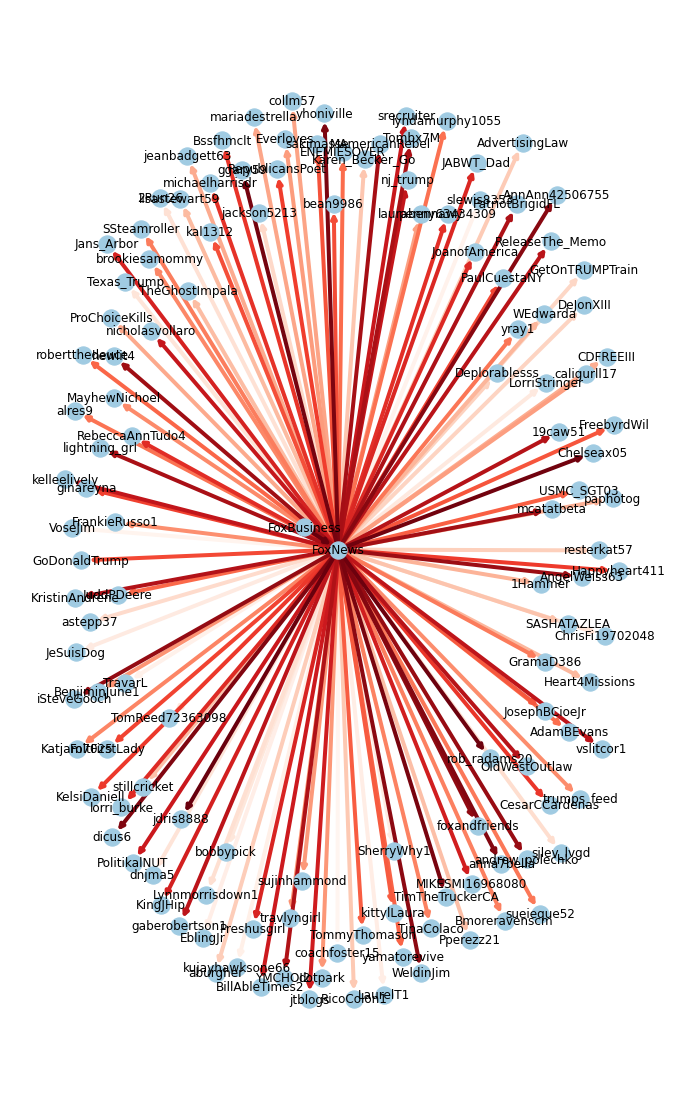

<Figure size 864x864 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,20)) 
pos = nx.spring_layout(G_rt,k=0.20,iterations=20)
colors = range(129)
nx.draw_networkx(G_rt,pos,arrows=True, node_color='#A0CBE2', edge_color=colors,width=4, edge_cmap=plt.cm.Reds, with_labels=True)
plt.axis('off')
plt.figure(3,figsize=(12,12))
plt.show()

It matches with the result of number 4.

# Part C

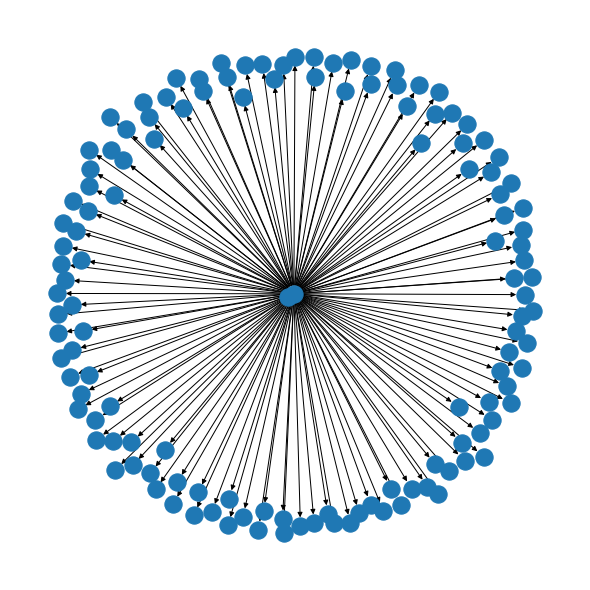

In [ ]:
G_rt_full = nx.from_pandas_edgelist(sotu_retweets, source ='retweeted_status-user-screen_name', target = 'user-screen_name', create_using = nx.DiGraph())
plt.figure(3,figsize=(8,8))
nx.draw(G_rt)
plt.show()

In [ ]:
incoming = nx.in_degree_centrality(G_rt_full)
df_incoming_top5 = pd.DataFrame(list(incoming.items()),columns = ['User','Value']) .sort_values(by=['Value'], ascending = [False]).head(5)
outgoing = nx.out_degree_centrality(G_rt_full)
df_outgoing_top5 = pd.DataFrame(list(outgoing.items()),columns = ['User','Value']) .sort_values(by=['Value'], ascending = [False]).head(5)
print(df_incoming_top5)
print(df_outgoing_top5)

                User     Value
475         nljac000  0.002187
204          aedaw9i  0.001750
417          CiAnDy3  0.001750
302  SteveJa39296543  0.001750
746    c5hardtop1999  0.001750
             User     Value
83        FoxNews  0.055993
37     WhiteHouse  0.031059
0    ScottPresler  0.029746
6      TomiLahren  0.019685
131  KyleKulinski  0.017060


# Part D

In [ ]:
rt_centrality = nx.betweenness_centrality(G_rt_full)
df_rt_centrality = pd.DataFrame(list(rt_centrality.items()),columns = ['User','Value']) .sort_values(by=['Value'], ascending = [False]).head(5)
df_rt_centrality

,User,Value
83,FoxNews,0.000026
28,Public_Citizen,0.000009
205,ChristiChat,0.000005
120,guypbenson,0.000005
361,johncardillo,0.000004


FoxNews has the biggest impact once FoxNews is removed.

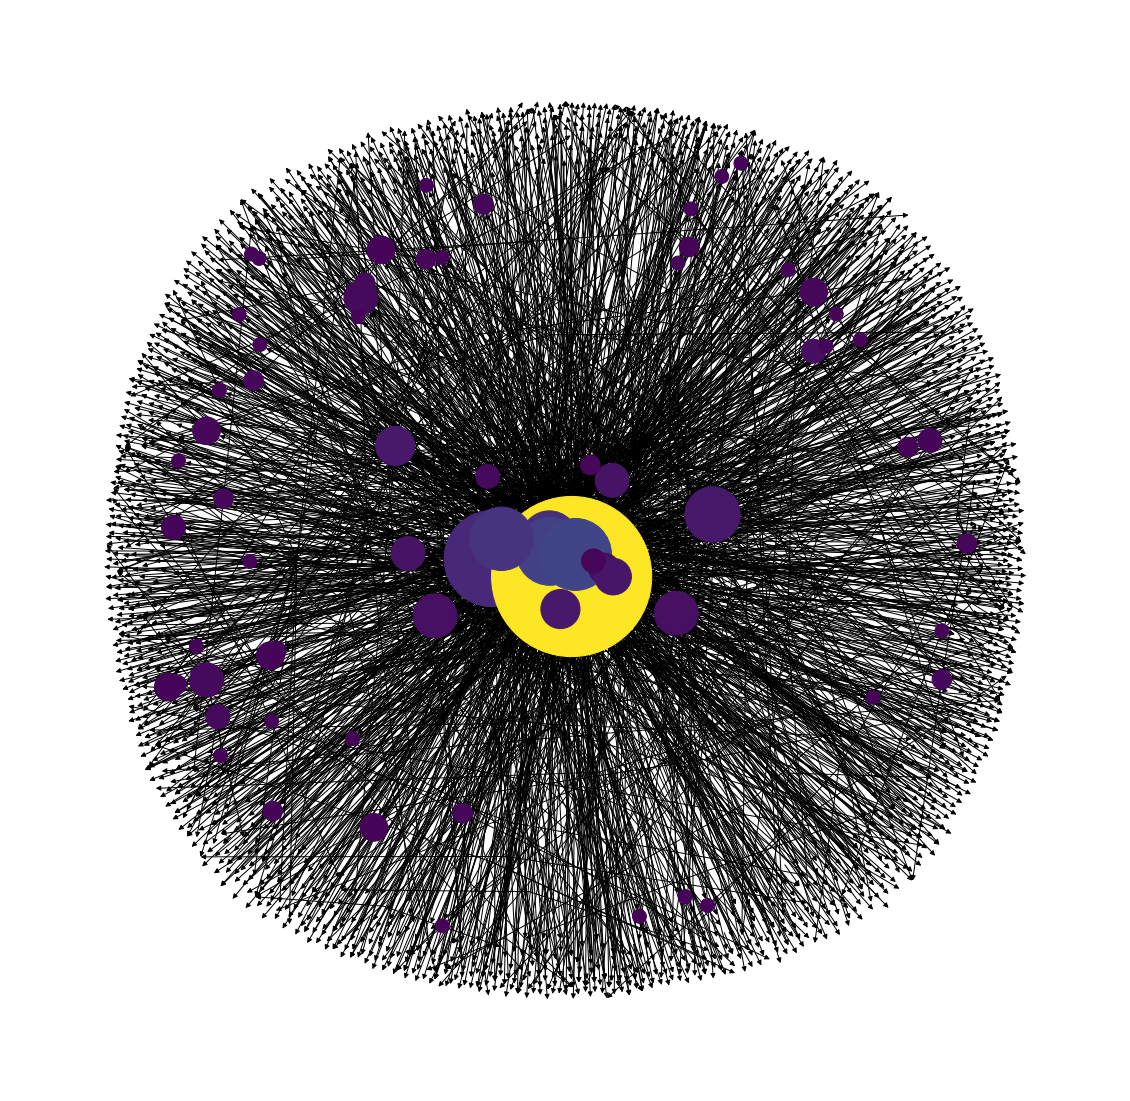

In [ ]:
node_color = [200000000.0 * G_rt_full.out_degree(v) for v in G_rt_full]
node_size =  [v * 1000000000 for v in rt_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_rt_full, with_labels=False,node_color=node_color, node_size=node_size )
plt.axis('off')
plt.show()

FoxNews has highest impact if removed (is aligned with betweenness). Hence, FoxNews is the big yellow circle.

In [ ]:
#clean the text, i.e. remove mentions and stuff
sotu_retweets_Fox['all_text']=[clean(doc) for doc in sotu_retweets_Fox['text']]
sotu_retweets_Fox

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status-extended_tweet-full_text,quoted_status-text,quoted_status-user-screen_name,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries,all_text
52,NaN,NaN,Wed Jan 31 03:14:11 +0000 2018,NaN,0,False,low,NaN,958538876695523328,958538876695523328,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""Terrorists who do things like place ...",".@POTUS: ""Terrorists who do things like place ...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""Terrorists who do thing...",1517368451652,False,coachfoster15,NaN,": .: ""Terrorists who do things like place bomb..."
55,NaN,NaN,Wed Jan 31 02:52:54 +0000 2018,NaN,0,False,low,NaN,958533520988753923,958533520988753923,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""For decades, open borders have allow...",".@POTUS: ""For decades, open borders have allow...",FoxNews,"<a href=""http://twitter.com/#!/download/ipad"" ...","RT @FoxNews: .@POTUS: ""For decades, open borde...",1517367174752,False,VoseJim,NaN,": .: ""For decades, open borders have allowed d..."
58,NaN,NaN,Wed Jan 31 03:06:20 +0000 2018,NaN,0,False,low,NaN,958536901211967489,958536901211967489,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""We celebrate our police, our militar...",".@POTUS: ""We celebrate our police, our militar...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""We celebrate our police...",1517367980660,False,slewis8353,NaN,": .: ""We celebrate our police, our military, a..."
73,NaN,NaN,Wed Jan 31 03:16:53 +0000 2018,NaN,0,False,low,NaN,958539556155994112,958539556155994112,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,.@POTUS: â€œLetâ€™s begin tonight by recognizi...,.@POTUS: â€œLetâ€™s begin tonight by recognizi...,FoxNews,"<a href=""http://twitter.com/download/android"" ...",RT @FoxNews: .@POTUS: â€œLetâ€™s begin tonight...,1517368613648,False,TravarL,NaN,: .: Lets begin tonight by recognizing that th...
84,NaN,NaN,Wed Jan 31 03:36:51 +0000 2018,NaN,0,False,low,NaN,958544581058064384,958544581058064384,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""We repealed the core of disastrous #...",".@POTUS: ""We repealed the core of disastrous #...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""We repealed the core of...",1517369811678,False,kujayhawksone66,NaN,": .: ""We repealed the core of disastrous : the..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,NaN,NaN,Wed Jan 31 02:04:59 +0000 2018,"{'media': [{'id': 958520419908313090, 'id_str'...",0,False,low,NaN,958521462540808192,958521462540808192,NaN,NaN,NaN,NaN,NaN,False,und,NaN,False,0,NaN,NaN,NaN,NaN,NaN,0,0,False,NaN,.@POTUS's Cabinet arrives. #SOTU https://t.co/...,FoxNews,"<a href=""http://twitter.com/download/android"" ...",RT @FoxNews: .@POTUS's Cabinet arrives. #SOTU ...,1517364299794,False,TimTheTruckerCA,NaN,: .'s Cabinet arrives.
2210,NaN,NaN,Wed Jan 31 03:43:57 +0000 2018,NaN,0,False,low,NaN,958546368225857536,958546368225857536,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,0,NaN,NaN,NaN,NaN,NaN,0,0,False,NaN,'Legend from Louisiana': Trump Honors 2017's A...,FoxNews,"<a href=""http://twitter.com/download/iphone"" r...",RT @FoxNews: 'Legend from Louisiana': Trump Ho...,1517370237772,False,ggary59,NaN,: 'Legend from 

In [ ]:
all_text_string = ' '.join(sotu_retweets_Fox.all_text)

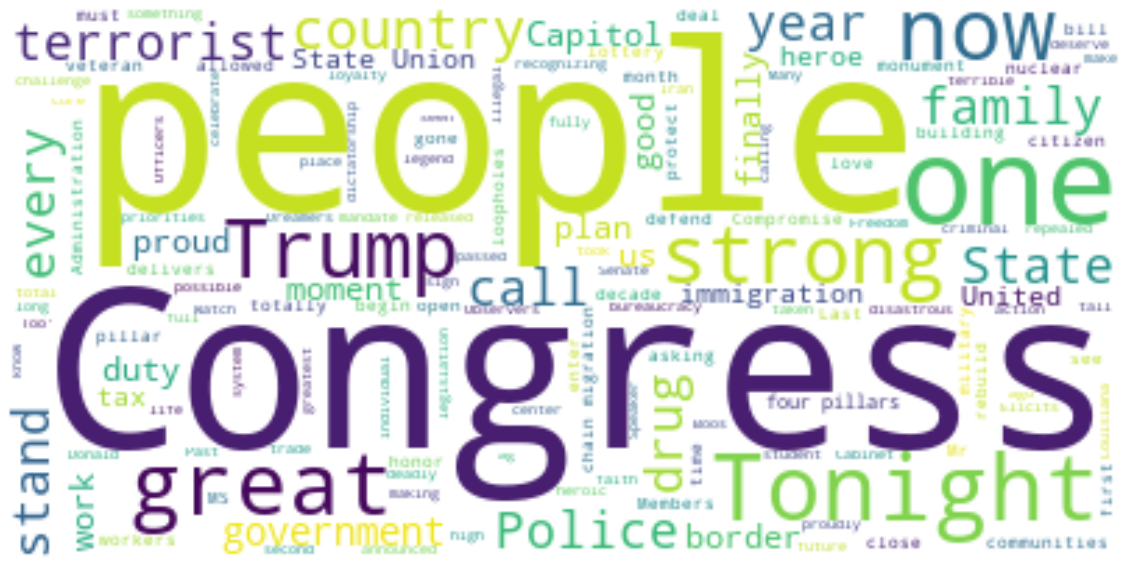

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "amp", "america", "american", "americans", "president", "will", "address", "new"])
plt.figure(figsize=(20,20))
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A lot of political issues.